In [9]:
### Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\2938172656.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2025-04-11-11-48_Pre_D_Re_1.csv",delimiter=';',encoding='utf-8',decimal=',')


0       0.000
1       0.001
2       0.002
3       0.003
4       0.004
        ...  
5524    5.524
5525    5.525
5526    5.526
5527    5.527
5528    5.528
Name: time, Length: 5529, dtype: float64
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5524   -54.421829
5525   -54.421829
5526   -54.481526
5527   -54.478435
5528   -54.489464
Name: Force plate group-Center of pressure-x (mm), Length: 5529, dtype: float64
Standardabweichung CoPx:  9.814578742348086


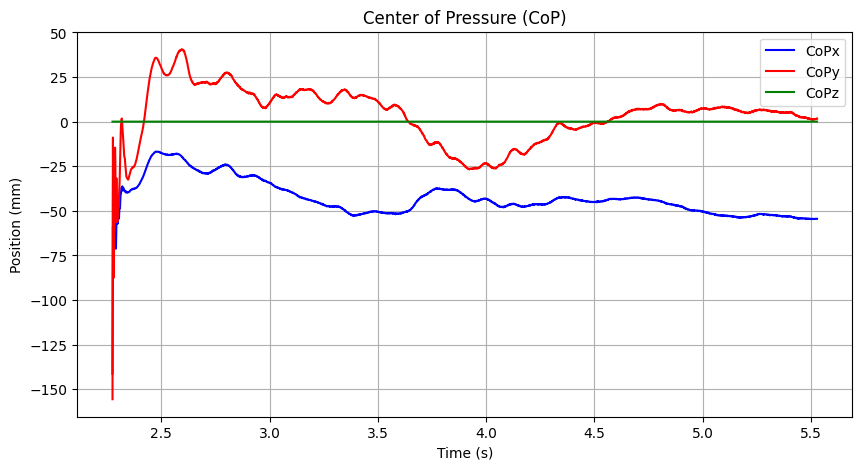

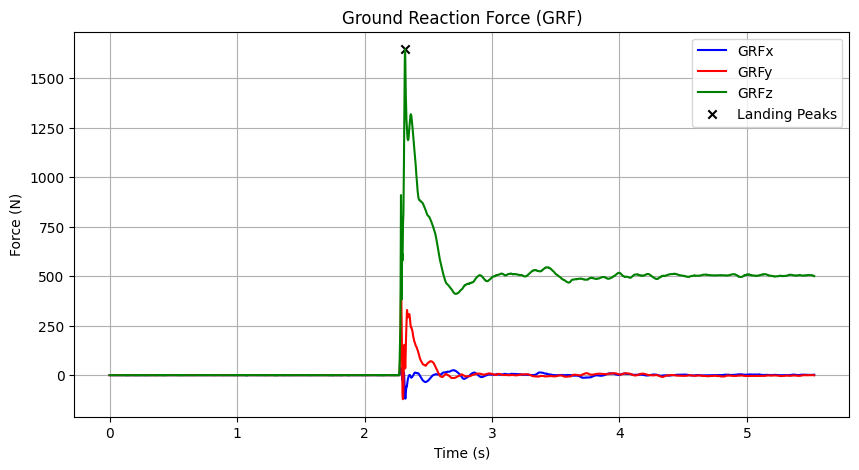

In [11]:
df = pd.read_csv("2025-04-11-11-48_Pre_D_Re_1.csv",delimiter=';',encoding='utf-8',decimal=',')
time = df["time"]  # Zeit in Sekunden
time = time - time[0]  # Zeit relativ zur ersten Zeit
print(time)

CoPx = df["Force plate group-Center of pressure-x (mm)"]
CoPy = df["Force plate group-Center of pressure-y (mm)"]
CoPz = df["Force plate group-Center of pressure-z (mm)"]

#CoP = CoP - CoP[0]  # CoP relativ zur ersten Position
print(CoPx)
std_copx = CoPx.std()
print("Standardabweichung CoPx: ", std_copx)

GRFx= df["Force plate group-Ground reaction force-x (N)"]
GRFy= df["Force plate group-Ground reaction force-y (N)"]
GRFz= df["Force plate group-Ground reaction force-z (N)"]

#detect landing peaks
peaks, _ = find_peaks(GRFz, height=1400)  # Höhe anpassen, um nur die relevanten Peaks zu finden


#Plotten der CoP-Daten in einem Plot
plt.figure(figsize=(10, 5))
plt.plot(time, CoPx, label='CoPx', color='blue')
plt.plot(time, CoPy, label='CoPy', color='red')
plt.plot(time, CoPz, label='CoPz', color='green')
plt.title('Center of Pressure (CoP)')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')
plt.legend()
plt.grid()
plt.show()

#Plotten der GRF-Daten in einem Plot
plt.figure(figsize=(10, 5))
plt.plot(time, GRFx, label='GRFx', color='blue')
plt.plot(time, GRFy, label='GRFy', color='red')
plt.plot(time, GRFz, label='GRFz', color='green')
plt.title('Ground Reaction Force (GRF)')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
#mark landing peak with an x 
plt.scatter(time[peaks], GRFz[peaks], color='black', label='Landing Peaks', marker='x')
plt.legend()
plt.grid()
plt.show()


